In [1]:
import glob
import gzip
import itertools
import csv
import io
import tqdm
import pickle
import pandas as pd
import seaborn as sns
sns.set()
import scipy
import matplotlib.pyplot as plt
import numpy as np

# WMT16-19 system-level data

### agg

In [2]:
wmt16 = pickle.load(open('data/pickles/wmt16-sys_level-agg.pkl', 'rb'))
wmt16['year'] = len(wmt16)*[2016]

wmt17 = pickle.load(open('data/pickles/wmt17-sys_level-agg.pkl', 'rb'))
wmt17['year'] = len(wmt17)*[2017]

wmt18 = pickle.load(open('data/pickles/wmt18-sys_level-agg.pkl', 'rb'))
wmt18['year'] = len(wmt18)*[2018]

wmt19 = pickle.load(open('data/pickles/wmt19-sys_level-agg.pkl', 'rb'))
wmt19['year'] = len(wmt19)*[2019]

wmt_mst = pd.concat([wmt16, wmt17, wmt18, wmt19])

/home/nlg-05/jtwei/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [3]:
wmt_mst.count()

BLEU         440
CDER         440
NIST         440
PER          440
TER          440
WER          440
lp           444
raw_score    444
score        444
system       444
year         444
dtype: int64

In [4]:
wmt_mst

,BLEU,CDER,NIST,PER,TER,WER,lp,raw_score,score,system,year
0,0.2916,0.4950,8.1473,0.6103,0.4844,0.4454,cs-en,70.844961,0.050822,online-B,2016
1,0.3297,0.5265,8.2267,0.6332,0.4971,0.4640,cs-en,75.383754,0.207242,uedin-nmt,2016
2,0.2954,0.4913,7.8778,0.6193,0.4625,0.4263,cs-en,68.954545,-0.024469,PJATK,2016
3,0.2818,0.4710,7.6764,0.5907,0.4409,0.3962,cs-en,69.455488,0.000170,online-A,2016
4,0.3178,0.5124,8.1369,0.6218,0.4815,0.4434,cs-en,72.568873,0.101488,jhu-pbmt,2016
...,...,...,...,...,...,...,...,...,...,...,...
76,0.3641,0.5197,8.3309,0.6065,0.4936,0.4665,de-fr,71.667707,0.019000,online-Y.0,2019
77,0.3415,0.4967,7.9147,0.5908,0.4629,0.4348,de-fr,68.846957,-0.104000,TartuNLP-c.6897,2019
78,0.3515,0.5002,7.9717,0.6134,0.4508,0.4212,de-fr,66.028620,-0.194000,online-A.0,2019
79,0.3412,0.4724,8.0219,0.5738,0.4308,0.4067,de-fr,64.970588,-0.240000,online-G.0,2019


In [5]:
wmt_mst[wmt_mst.BLEU.isna()]

,BLEU,CDER,NIST,PER,TER,WER,lp,raw_score,score,system,year
0,NaN,NaN,NaN,NaN,NaN,NaN,en-lv,54.399306,0.196,tilde-nc-nmt-smt-hybrid,2017
2,NaN,NaN,NaN,NaN,NaN,NaN,en-lv,51.121460,0.104,tilde-c-nmt-smt-hybrid,2017
42,NaN,NaN,NaN,NaN,NaN,NaN,lv-en,76.177248,0.245,tilde-nc-nmt-smt-hybrid,2017
44,NaN,NaN,NaN,NaN,NaN,NaN,lv-en,70.961390,0.083,tilde-c-nmt-smt-hybrid,2017


### all

In [6]:
wmt16 = pickle.load(open('data/pickles/wmt16-sys_level-all.pkl', 'rb'))
wmt16['year'] = len(wmt16)*[2016]

wmt17 = pickle.load(open('data/pickles/wmt17-sys_level-all.pkl', 'rb'))
wmt17['year'] = len(wmt17)*[2017]

wmt18 = pickle.load(open('data/pickles/wmt18-sys_level-all.pkl', 'rb'))
wmt18['year'] = len(wmt18)*[2018]

wmt19 = pickle.load(open('data/pickles/wmt19-sys_level-all.pkl', 'rb'))
wmt19['year'] = len(wmt19)*[2019]

wmt_mst_all = pd.concat([wmt16, wmt17, wmt18, wmt19])

In [7]:
wmt_mst_all.count()

system       698181
sid          698181
raw_score    698181
score        698181
N            698181
lp           698181
reference    698181
source       698181
output       676827
year         698181
dtype: int64

In [8]:
wmt_mst_all

,system,sid,raw_score,score,N,lp,reference,source,output,year
0,online-G,1906,78.0,0.002436,1,de-en,Rather than having an executive make the annou...,Anstatt einen Manager die Ankündigung machen z...,"Instead of a Manager the announcement, wrote R...",2016
1,uedin-pbmt,1906,49.0,-0.847957,1,de-en,Rather than having an executive make the annou...,Anstatt einen Manager die Ankündigung machen z...,"Instead of a manager make the announcement, ""w...",2016
2,online-B,1906,99.0,0.367600,2,de-en,Rather than having an executive make the annou...,Anstatt einen Manager die Ankündigung machen z...,Instead of letting a manager making the announ...,2016
3,online-F,1906,75.0,0.120502,1,de-en,Rather than having an executive make the annou...,Anstatt einen Manager die Ankündigung machen z...,Instead of letting a manager make the announce...,2016
4,uedin-nmt,1906,93.5,0.957601,2,de-en,Rather than having an executive make the annou...,Anstatt einen Manager die Ankündigung machen z...,Instead of letting a manager make the announce...,2016
...,...,...,...,...,...,...,...,...,...,...
108922,online-G.0,850,14.0,-0.996679,1,lt-en,If the State Consumer Rights Protection Author...,Valstybinei vartotojų teisių apsaugos tarnybai...,The state consumer rights protection authority...,2019
108923,MSRA.MASS.6945,850,50.0,-0.841789,1,lt-en,If the State Consumer Rights Protection Author...,Valstybinei vartotojų teisių apsaugos tarnybai...,If the State Consumer Rights Protection Author...,2019
108924,TartuNLP-c.6908,850,79.0,0.360166,2,lt-en,If the State Consumer Rights Protection Author...,Valstybinei vartotojų teisių apsaugos tarnybai...,State Consumer Rights Protection Service (VVTA...,2019
108925,JUMT.6616,850,99.0,0.680078,1,lt-en,If the State Consumer Rights Protection Author...,Valstybinei vartotojų teisių apsaugos tarnybai...,यदि राज्य उपभोक्ता अधिकार संरक्षण प्राधिकरण (ए...,2019


In [9]:
wmt_mst_all[wmt_mst_all.output.isna()]

,system,sid,raw_score,score,N,lp,reference,source,output,year
58,HUMAN,1154,100.000000,1.202478,2,de-en,"Arsenal manager Arsene Wenger, whose club is o...","Arsenal-Manager Arsene Wenger, dessen Verein i...",NaN,2018
75,HUMAN,1087,99.333333,0.903733,3,de-en,Minister of Agriculture in interview – How do ...,Landwirtschaftsminister im Interview - Wie sch...,NaN,2018
124,HUMAN,2701,98.000000,1.383347,1,de-en,"The blue ""business survey"" is only filled out ...","Der blaue ""Betriebsbogen"" ist nur auszufüllen,...",NaN,2018
141,HUMAN,366,78.250000,0.302420,4,de-en,"Earlier this year, French journalists Franck E...",Anfang des Jahres wurden die französischen Jou...,NaN,2018
168,HUMAN,637,94.333333,0.572058,3,de-en,"A hundred yards back, a group of about four do...",Ungefähr hundert Meter dahinter wischt sich ei...,NaN,2018
...,...,...,...,...,...,...,...,...,...,...
108856,HUMAN,90,99.000000,0.767574,1,lt-en,But the most interesting thing that happened o...,"Tačiau įdomiausias dalykas, nutikęs aikštelėje...",NaN,2019
108868,HUMAN,713,99.500000,0.991348,6,lt-en,A. Širinskienė proposed to expand this period ...,A. Širinskienė šį terminą pasiūlė pratęsti nur...,NaN,2019
108902,HUMAN,400,100.000000,0.928725,1,lt-en,The Eurogroup will overview draft budgets of t...,Euro grupėje bus apžvelgti Europos Komisijai (...,NaN,2019
108914,HUMAN,525,86.500000,0.453017,4,lt-en,"After her death, government officials were acc...",Po jos mirties valdžios pareigūnai sulaukė vis...,NaN,2019


# Baseline rankings over time

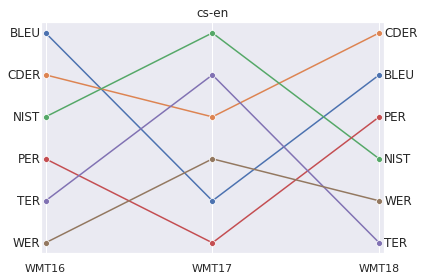

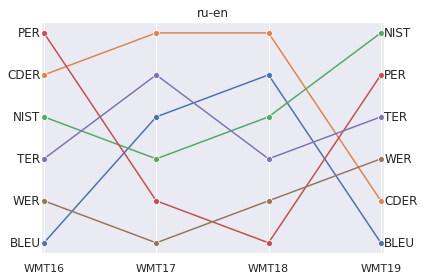

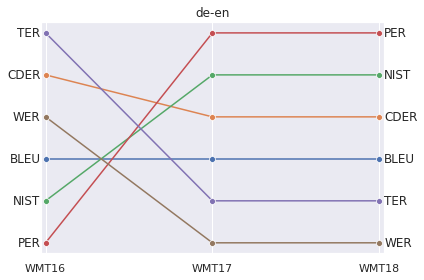

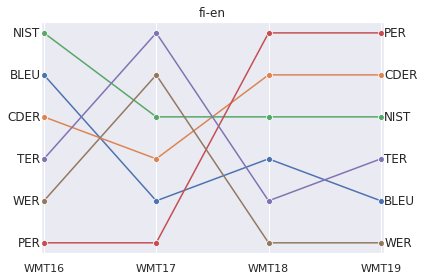

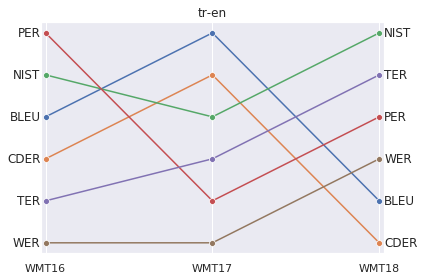

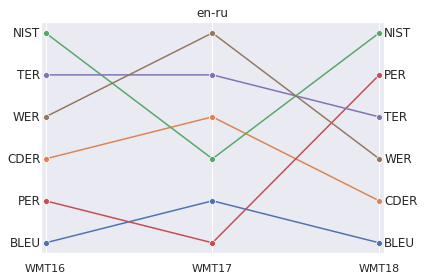

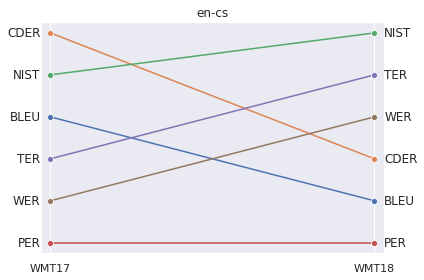

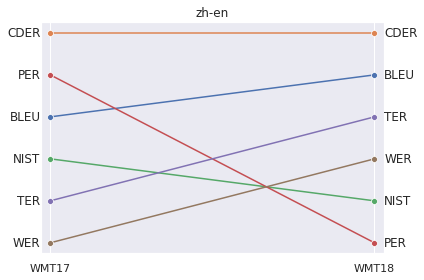

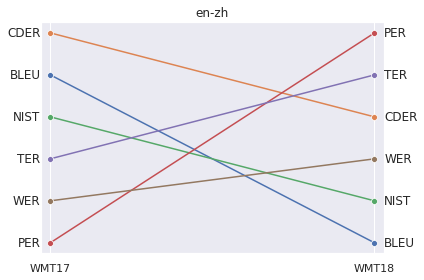

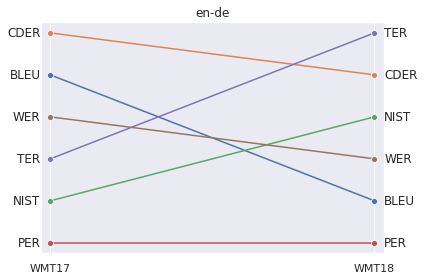

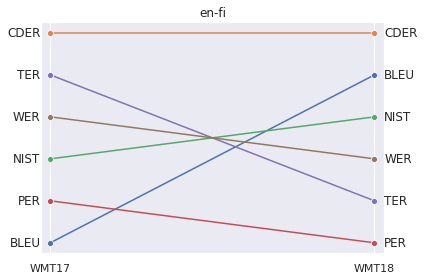

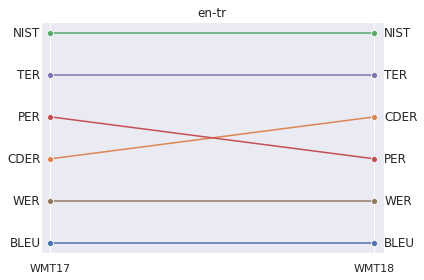

In [10]:
baselines = ['BLEU', 'CDER', 'NIST', 'PER', 'TER', 'WER']

for lp in wmt_mst.lp.unique():
    lp_df = wmt_mst[wmt_mst.lp == lp]
    
    if len(lp_df.year.unique()) <= 1:
        continue
    
    fig, ax = plt.subplots()
    plt.xticks([2016, 2017, 2018, 2019], ['WMT16', 'WMT17', 'WMT18', 'WMT19'])
    first_year, last_year = lp_df.year.unique()[0], lp_df.year.unique()[-1]
    
    x, y, grouping = [], [], []
    for i, year in enumerate(lp_df.year.unique()):
        for metric in baselines:
            x.append(year)
            corrs = lp_df[lp_df.year == year].drop('raw_score', axis=1) \
                .corr().rank(ascending=True)
            y.append(corrs['score'][metric])
            grouping.append(metric)
        
        if i == 0:
            left = [''] * len(baselines)
            for metric in baselines:
                left[int(corrs['score'][metric])-1] = metric
                
        if i == len(lp_df.year.unique())-1:
            right = [''] * len(baselines)
            for metric in baselines:
                right[int(corrs['score'][metric])-1] = metric
    
    for i, ll, rl in zip(range(1,7), left, right):
        ax.text(first_year-0.03, i, ll, horizontalalignment='right', verticalalignment='center', fontdict={'size':12})
        ax.text(last_year+0.03, i, rl, horizontalalignment='left', verticalalignment='center', fontdict={'size':12})
        
    g = sns.lineplot(x=x, y=y, hue=grouping, marker='o')
    g.legend_.remove()
    plt.title(lp)
    plt.yticks([])
    plt.xlim([first_year-0.03, last_year+0.03])

    fig.tight_layout()
    plt.savefig('figs/rankings/%s.png' % lp)

# WMT16-19 segment-level data

In [11]:
wmt16 = pickle.load(open('data/pickles/wmt16-seg_level-agg.pkl', 'rb'))
wmt16['year'] = len(wmt16)*[2016]

wmt17 = pickle.load(open('data/pickles/wmt17-seg_level-agg.pkl', 'rb'))
wmt17['year'] = len(wmt17)*[2017]

wmt_mst_seg = pd.concat([wmt16, wmt17])

/home/nlg-05/jtwei/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [12]:
wmt_mst_seg

,lp,output,reference,score,sid,source,system,year
0,de-en,"He added that he hoped the company ""is a hit f...","He added that he wants the Corporation to ""fin...",0.691142,677,"Er fügte hinzu, er wünsche sich, dass das Unte...",jhu-syntax,2016
1,de-en,On Wednesday morning there still 40 refugees w...,On Wednesday morning another 40 refugees were ...,-0.762188,1092,Am Mittwochmorgen hätten sich dort noch 40 Flü...,jhu-pbmt,2016
2,de-en,"The Hearts Verteidigers led 2: 1, was sent fro...",Hearts were leading 2-1 when Paterson was dism...,-0.599309,1375,"Die Hearts führten 2:1, als Paterson vom Feld ...",online-B,2016
3,de-en,And for every doll that looks like him and goe...,And for every doll that looks like him and pas...,-0.305292,616,"Und bei jeder Puppe, die aussieht wie er und ü...",online-G,2016
4,de-en,"Gyorgy Bakondi, country security adviser for O...","Gyorgy Bakondi, homeland security adviser to O...",0.362249,679,"Gyorgy Bakondi, Landes-Sicherheitsberater für ...",jhu-syntax,2016
...,...,...,...,...,...,...,...,...
5035,en-ru,"Кендалл, который является послом марки Estee Л...","Кендалл, которая является лицом бренда Estee L...",-0.140292,2642,"Kendall, who is an Estee Lauder brand ambassad...",jhu-pbmt,2017
5036,en-ru,"Во вторник, в ""Фейсбуке"" сообщил, что его наст...","Во вторник Facebook объявил, что настольная ве...",0.087274,2719,"On Tuesday, Facebook said that its desktop web...",jhu-pbmt,2017
5037,en-ru,Результат средние температуры климата которые ...,Результатом являются средние климатические тем...,-0.836368,2760,The result is mean climate temperatures that a...,online-F,2017
5038,en-ru,"По их пиковым ставкам, эти матовые звезды отни...",На своих пиковых скоростях вращения эти взросл...,-1.162147,2803,"At their peak spin rates, these maturing stars...",uedin-nmt,2017


In [13]:
wmt_mst_seg.groupby(['year','lp']).count()

output  reference  score  sid  source  system
year lp                                                  
2016 cs-en     560        560    560  560     560     560
     de-en     560        560    560  560     560     560
     en-ru     560        560    560  560     560     560
     fi-en     560        560    560  560     560     560
     ro-en     560        560    560  560     560     560
     ru-en     560        560    560  560     560     560
     tr-en     560        560    560  560     560     560
2017 cs-en     560        560    560  560     560     560
     de-en     560        560    560  560     560     560
     en-ru     560        560    560  560     560     560
     en-zh     560        560    560  560     560     560
     fi-en     560        560    560  560     560     560
     lv-en     560        560    560  560     560     560
     ru-en     560        560    560  560     560     560
     tr-en     560        560    560  560     560     560
     zh-en     560        560    560  560     560     560